In [1]:
%pylab notebook
%matplotlib notebook

import os, glob

import numpy as np

from scipy.ndimage.filters import convolve

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import rawpy

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot(imagelist, slicelist):
    result = []
    figsize(9,7)
    fig = plt.figure() 
    ax = None
    for image, aslice, i in zip(imagelist, slicelist, range(0,4)): 
        if ax is None:
            ax = fig.add_subplot(2, 2, i+1)
        else:
            ax1 = fig.add_subplot(2, 2, i+1, sharex=ax, sharey=ax)
        im = image[aslice]
        plt.imshow(im)
        plt.colorbar()
        result.append(im)
    plt.show()
    return result

In [3]:
fpath = '../astrophotography_data/comet2020F3'
filelist = glob.glob(fpath + '/*.ARW')

In [4]:
imagelist = []
for file in filelist:
    raw = rawpy.imread(file)
    
    rgb = raw.postprocess(
        demosaic_algorithm=rawpy.DemosaicAlgorithm.LINEAR,
        output_bps=16,
        gamma=(0.8,1), 
        use_camera_wb=False,
        use_auto_wb=False,
        no_auto_bright=True, 
        no_auto_scale=True,
        output_color=rawpy.ColorSpace.raw
    )

    rgb[::,::,0] = rgb[::,::,0] * raw.camera_whitebalance[0] / raw.camera_whitebalance[1] * 1.
    rgb[::,::,2] = rgb[::,::,2] * raw.camera_whitebalance[2] / raw.camera_whitebalance[1] * 1.1
    
    
    imagelist.append(rgb / 2000.)

In [5]:
HSIZE = 500

C1_X = 1300 - HSIZE + 488
C1_Y = 1300 - HSIZE + 525

C2_X = 1300 - HSIZE + 528
C2_Y = 1300 - HSIZE + 430

C3_X = 1300 - HSIZE + 467
C3_Y = 1300 - HSIZE + 534

C4_X = 1300 - HSIZE + 513
C4_Y = 1300 - HSIZE + 412

slicelist = []

slicelist.append(np.index_exp[C1_Y-HSIZE:C1_Y+HSIZE,C1_X-HSIZE:C1_X+HSIZE])
slicelist.append(np.index_exp[C2_Y-HSIZE:C2_Y+HSIZE,C2_X-HSIZE:C2_X+HSIZE])
slicelist.append(np.index_exp[C3_Y-HSIZE:C3_Y+HSIZE,C3_X-HSIZE:C3_X+HSIZE])
slicelist.append(np.index_exp[C4_Y-HSIZE:C4_Y+HSIZE,C4_X-HSIZE:C4_X+HSIZE])

<IPython.core.display.Javascript object>


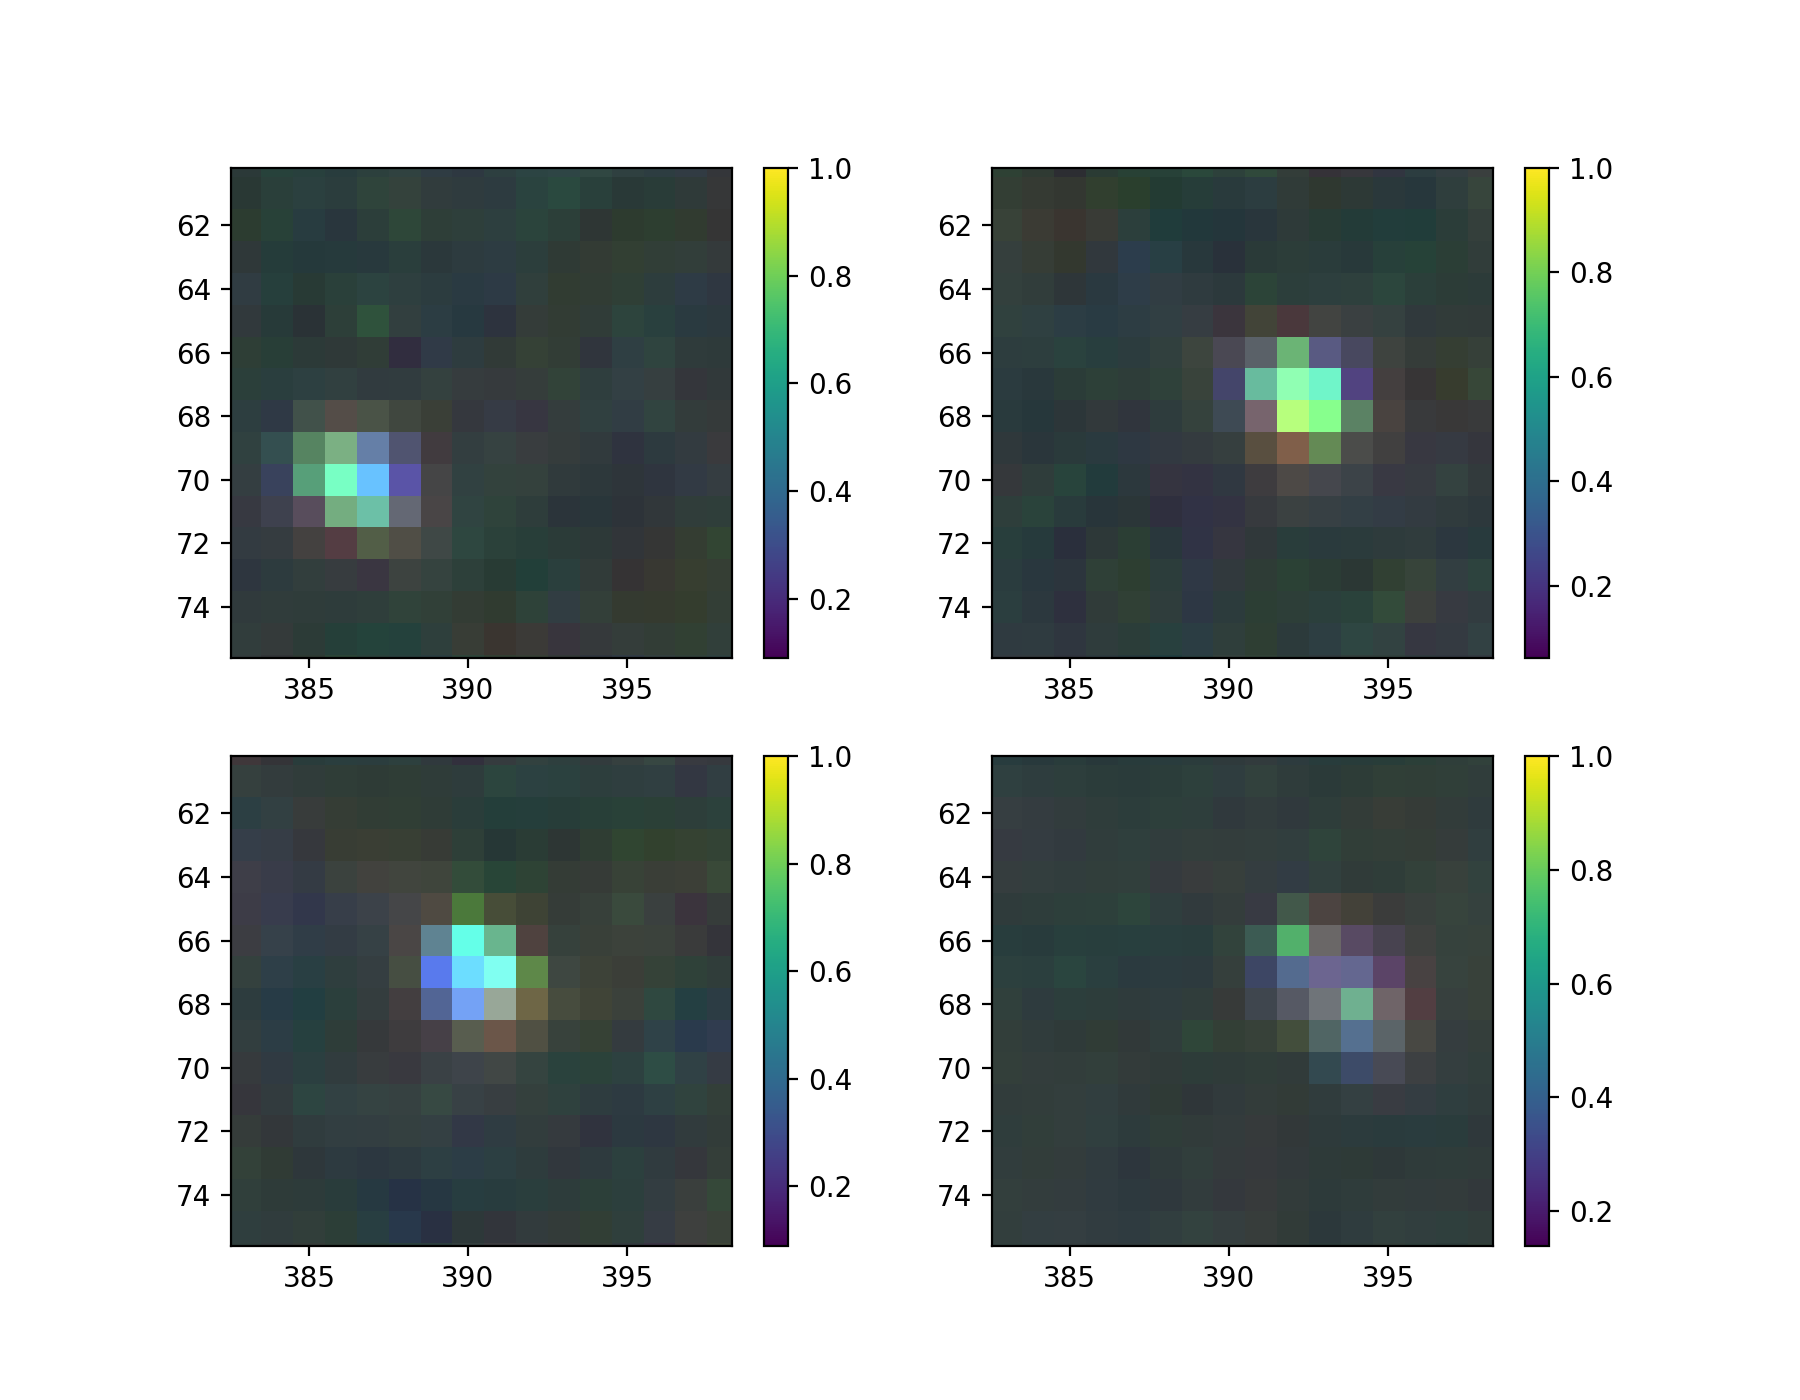

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [6]:
imlist = plot(imagelist, slicelist)

In [7]:
summed = np.zeros(shape=imlist[0].shape)
for rgb in imlist:
    summed[::,::,0] += rgb[::,::,0]
    summed[::,::,1] += rgb[::,::,1]
    summed[::,::,2] += rgb[::,::,2]
summed = summed / len(imlist) 

<IPython.core.display.Javascript object>


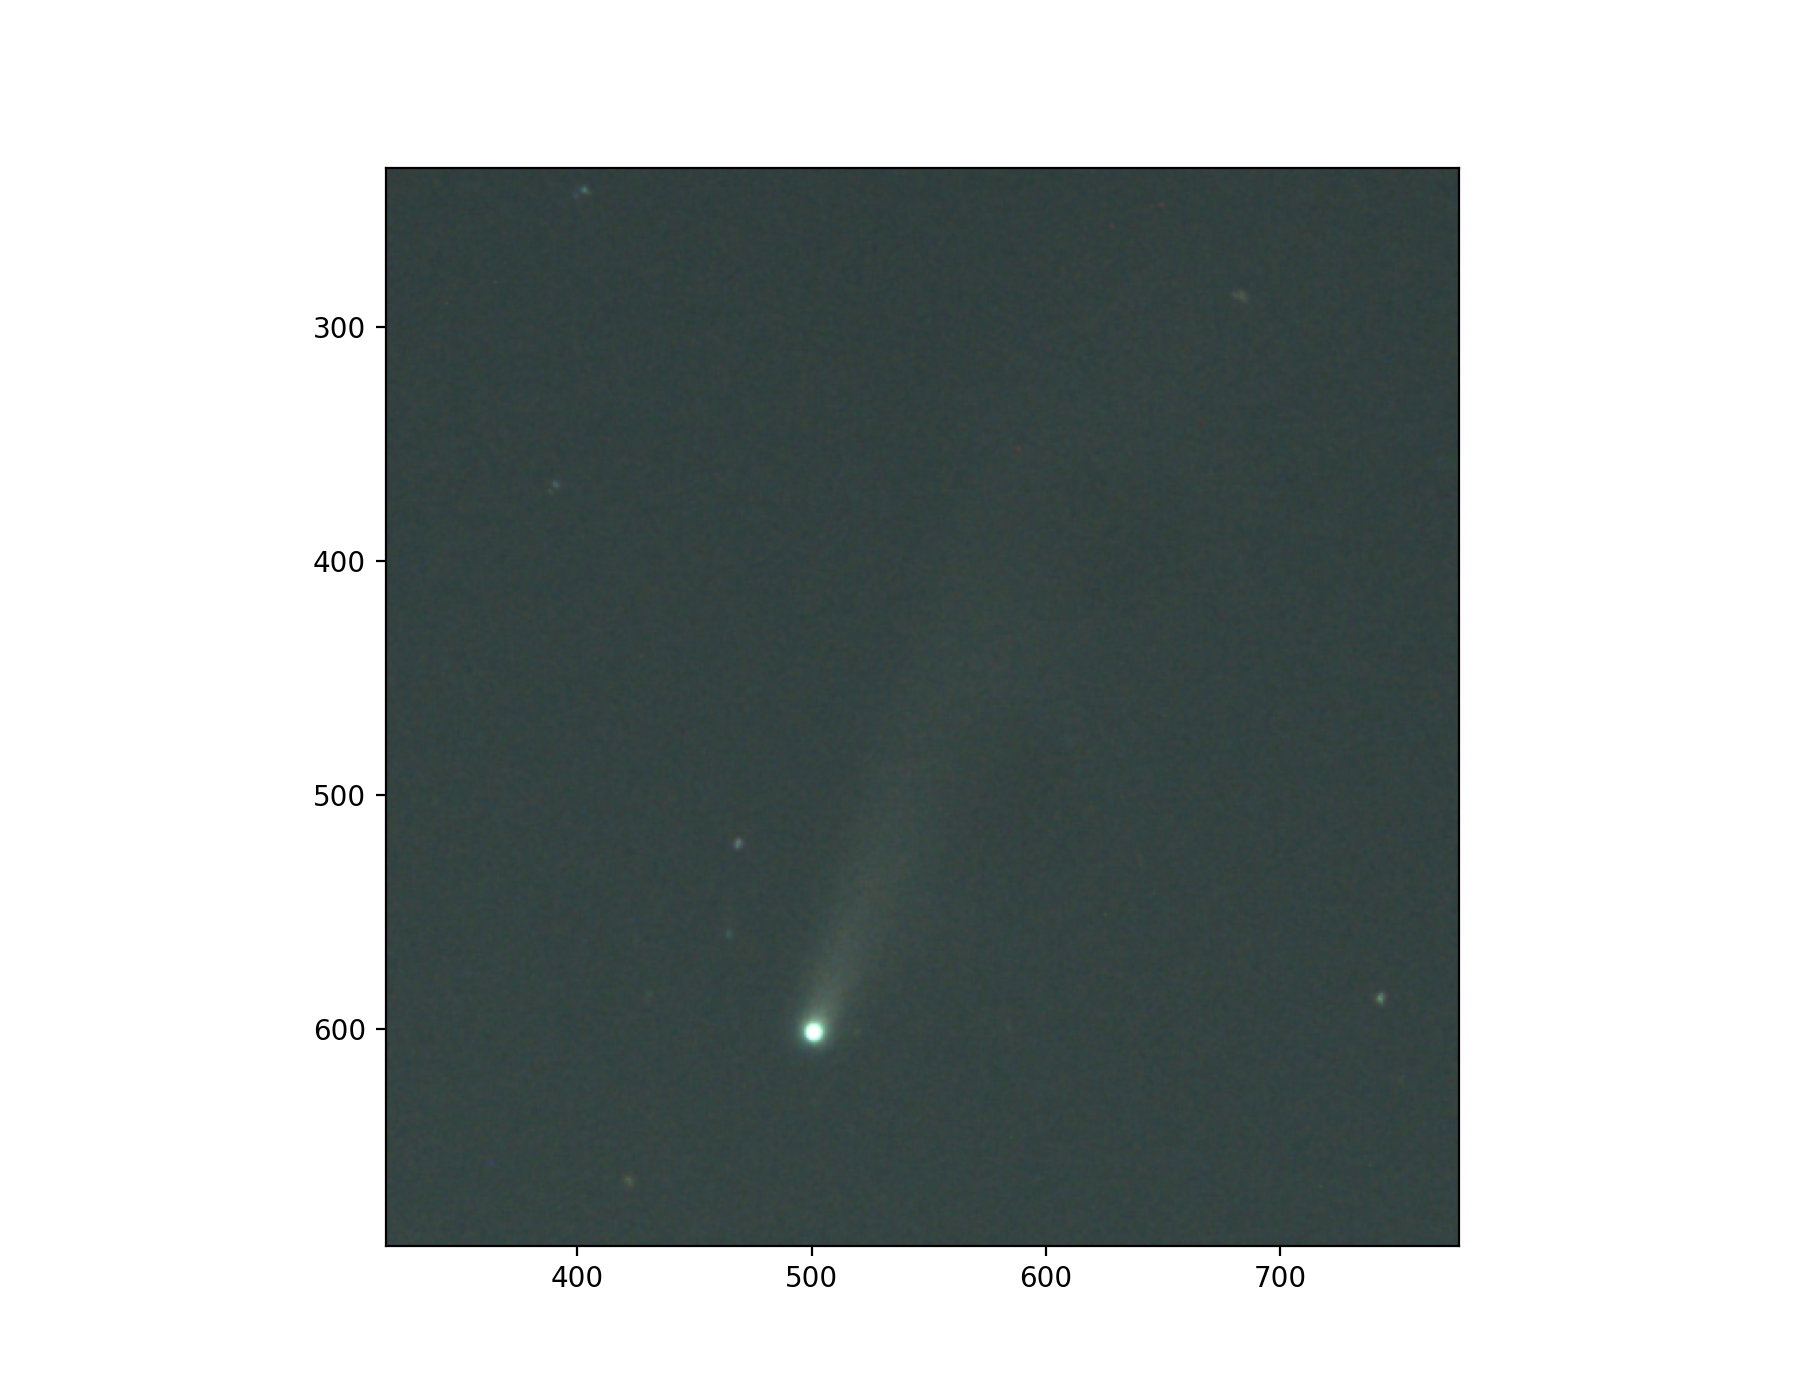

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [8]:
figsize(9,7)
fig = plt.figure() 
ax = fig.add_subplot()
plt.imshow(summed)